In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from src.models.ig import information_gain
from sklearn.preprocessing import MinMaxScaler

In [23]:
image_path = '../data/raw/michelangelo/all-channels.mat'
input_data = sio.loadmat(image_path)['data']
visible = input_data[:, :, 0:15] / 255.0
target = input_data[:, :,  26] / 255.0

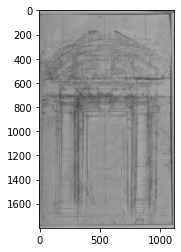

In [24]:
plt.imshow(target, cmap=plt.cm.gray)

In [25]:
ig, approx, net = information_gain(visible, target)

Selecting 25000 samples randomly for use by algorithm.
Adding input layer, width = 15
Adding dense layer, width = 25
Adding dense layer, width = 25
Adding dense layer, width = 1
Compiling model took 0.0154's.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 29us/sample - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0032 - val_mean_squared_error: 0.0032

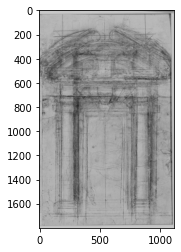

In [26]:
plt.imshow(approx, cmap=plt.cm.gray)

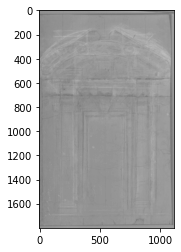

In [27]:
plt.imshow(target-np.squeeze(approx), cmap=plt.cm.gray)

In [34]:
diff = adjust_gamma(
    (np.abs(np.squeeze(approx) - target)*255.0).astype(np.uint8),
    2.5
)/255.0

imgs = np.concatenate((target, np.squeeze(approx), diff), axis=1)
cv2.imshow('Target | Approx | Diff', imgs)
cv2.waitKey(0)
cv2.destroyAllWindows()




In [29]:
def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table

	return cv2.LUT(image, table)

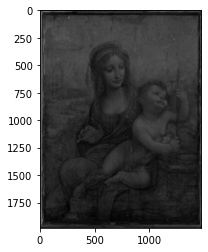

In [11]:
plt.imshow(np.squeeze(t), cmap=plt.cm.gray)

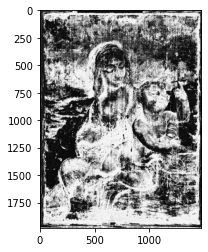

In [27]:
p = adjust_gamma((np.abs(approx - t)*255.0).astype(np.uint8))
plt.imshow(p, cmap=plt.cm.gray)






In [41]:
target.shape

(1980, 1472)

In [42]:
approx.shape

(1980, 1472, 1)